## Семинар 13: "Обучение с подкреплением 1"

ФИО: Кафанов Олег Игоревич

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [1]:
import sys 
sys.path

sys.path.append("/home/fox/gym")
sys.path

['',
 '/home/fox/anaconda2/lib/python27.zip',
 '/home/fox/anaconda2/lib/python2.7',
 '/home/fox/anaconda2/lib/python2.7/plat-linux2',
 '/home/fox/anaconda2/lib/python2.7/lib-tk',
 '/home/fox/anaconda2/lib/python2.7/lib-old',
 '/home/fox/anaconda2/lib/python2.7/lib-dynload',
 '/home/fox/.local/lib/python2.7/site-packages',
 '/home/fox/anaconda2/lib/python2.7/site-packages',
 '/home/fox/gym',
 '/home/fox/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/fox/.ipython',
 '/home/fox/gym']

In [2]:
import gym
import numpy as np 

#create a single game instance
env = gym.make("FrozenLake-v0")

#start new game
env.reset();

[2018-01-22 15:56:42,949] Making new env: FrozenLake-v0


In [3]:
# display the game state
env.render()


SFFF
FHFH
FFFH
HFFG


### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it for now

In [4]:
print("initial observation code:", env.reset())
print('printing observation:')
env.render()
print("observations:", env.observation_space, 'n=', env.observation_space.n)
print("actions:", env.action_space, 'n=', env.action_space.n)

('initial observation code:', 0)
printing observation:

SFFF
FHFH
FFFH
HFFG
('observations:', Discrete(16), 'n=', 16)
('actions:', Discrete(4), 'n=', 4)


In [5]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
print("printing new state:")
env.render()

taking action 2 (right)
('new observation code:', 4)
('reward:', 0.0)
('is game over?:', False)
printing new state:
  (Right)
SFFF
FHFH
FFFH
HFFG


In [6]:
action_to_i = {
    'left':0,
    'down':1,
    'right':2,
    'up':3
}

### Попробуйте походить по замерзшему озеру, не упав в дырку. 
* Каждый шаг вы с вероятностью __0.5__ будете двигаться в выбранном направлении и с вероятностью __0.5__ в случайном.
* Если упадете, используйте __env.reset()__ чтобы перезапустить __env__

In [57]:
env.reset()

0

In [58]:
env.step(action_to_i['down'])
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [60]:
env.step(action_to_i['left'])
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


In [62]:
env.step(action_to_i['up'])
env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG


In [63]:
env.step(action_to_i['right'])
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [67]:
env.step(action_to_i['right'])
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [70]:
env.step(action_to_i['right'])
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [71]:
env.step(action_to_i['left'])
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


In [72]:
env.step(action_to_i['down'])
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


## Задание: 
Следуя шаблонам функций реализуйте алгоритм Policy iteration.
Протестируйте его с помощью функции __evaluate_policy__.
Попробуйте разные значение для gamma и сравните результаты.

In [73]:
def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [74]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [75]:
# Используя фиксированную value_function и жадную стратегию получите policy

def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.env.nS)
    for s in range(env.env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma *v[s_]))
        policy[s] = np.argmax(q_sa)

    return policy

In [76]:
# Используя фиксированную policy с помощью сэмплирования получите оценку для value_function с точностью 1e-10

def compute_policy_v(env, policy, gamma=1.0):
    v = np.zeros(env.nS)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = 0
            for p, s_, r, _ in env.P[s][policy_a]:
                v[s] += p * (r + gamma * prev_v[s_]) #можно v а не prev_v
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break

    return v

In [77]:
def policy_iteration(env, gamma = 1.0):
    policy = np.random.choice(env.nA, size=(env.nS))
    max_iterations = 100000
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma) 
        new_policy =  extract_policy(old_policy_v, gamma) 
        if (np.all(policy == new_policy)):
            break

        policy = new_policy
    return policy

In [78]:
gamma = 1.0
env = gym.make("FrozenLake-v0")
optimal_policy = policy_iteration(env.env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

print(policy_score)

[2018-01-22 16:02:41,992] Making new env: FrozenLake-v0


0.73


In [79]:
print optimal_policy

[ 0.  3.  3.  3.  0.  0.  0.  0.  3.  1.  0.  0.  0.  2.  1.  0.]


In [113]:
env = gym.make("FrozenLake-v0")

score_list = []
for i in range(1,101,1):
    gamma = i/100.

    optimal_policy = policy_iteration(env.env, gamma=gamma)
    policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)
    score_list += [[gamma, policy_score]]
    #print (gamma, policy_score)

[2018-01-22 16:16:18,998] Making new env: FrozenLake-v0


In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

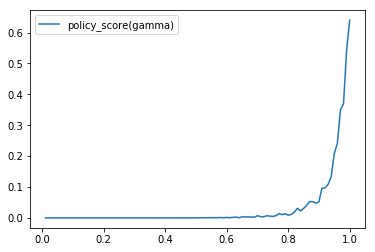

In [120]:
score_list = np.array(score_list)
plt.plot(score_list[:,:1], score_list[:,1:], label='policy_score(gamma)')
plt.legend()